##  Partie 1 : Histogramme

### 1. Afficher l'histogramme d'une image, sur différents types d'images de l'archive (faiblement ou fortement contrastée, claire, sombre, couleur) et commentez. Vous pouvez utiliser Il les fonctions disponibles dans les librairies, par ex dans OpenCV ou NumPy:

In [11]:
import numpy as np
import matplotlib.pyplot as plt 
import os

In [12]:
images_name = os.listdir(os.path.join(os.getcwd(), "images"))


In [82]:
images = {image_name[:image_name.index(".")] : plt.imread(os.path.join(os.getcwd(), "images", image_name)) for image_name in images_name}

hist_bins = { image[0]: np.histogram(image[1].ravel(),256,[0,255]) for image in images.items()}


In [83]:
def reval(img : np.ndarray):
    res = np.zeros(256)
    for i in range(256):
        res[i] = np.sum(img == i)
    return res

reval2 = lambda img : [np.sum(img == i) for i in range(256)]

print(reval(images["ancien"]))
print(reval2(images["ancien"]))

[ 213.  462. 3050. 1332. 2769. 1492. 2374. 1422. 1750. 1226. 1296. 1103.
 1135. 1064. 1093.  937.  887.  867.  798.  785.  786.  739.  788.  678.
  675.  656.  628.  587.  613.  634.  635.  634.  664.  578.  608.  582.
  527.  578.  587.  591.  537.  577.  582.  572.  569.  582.  574.  566.
  539.  551.  506.  539.  518.  477.  500.  512.  444.  470.  498.  477.
  485.  480.  485.  497.  516.  497.  506.  517.  507.  554.  536.  517.
  493.  514.  553.  580.  524.  602.  597.  569.  599.  596.  706.  624.
  631.  672.  627.  701.  737.  741.  747.  739.  787.  773.  795.  767.
  742.  801.  827.  794.  806.  775.  779.  734.  806.  739.  775.  775.
  784.  783.  824.  853.  791.  803.  901.  860.  855.  805.  916.  810.
  966.  882.  919.  927.  921.  962. 1070. 1048. 1092. 1134. 1193. 1241.
 1230. 1263. 1393. 1393. 1487. 1501. 1594. 1604. 1577. 1606. 1679. 1619.
 1626. 1676. 1666. 1842. 1857. 1939. 1883. 1960. 1953. 2067. 1991. 1900.
 1900. 1837. 1840. 1778. 1725. 1716. 1682. 1641. 16

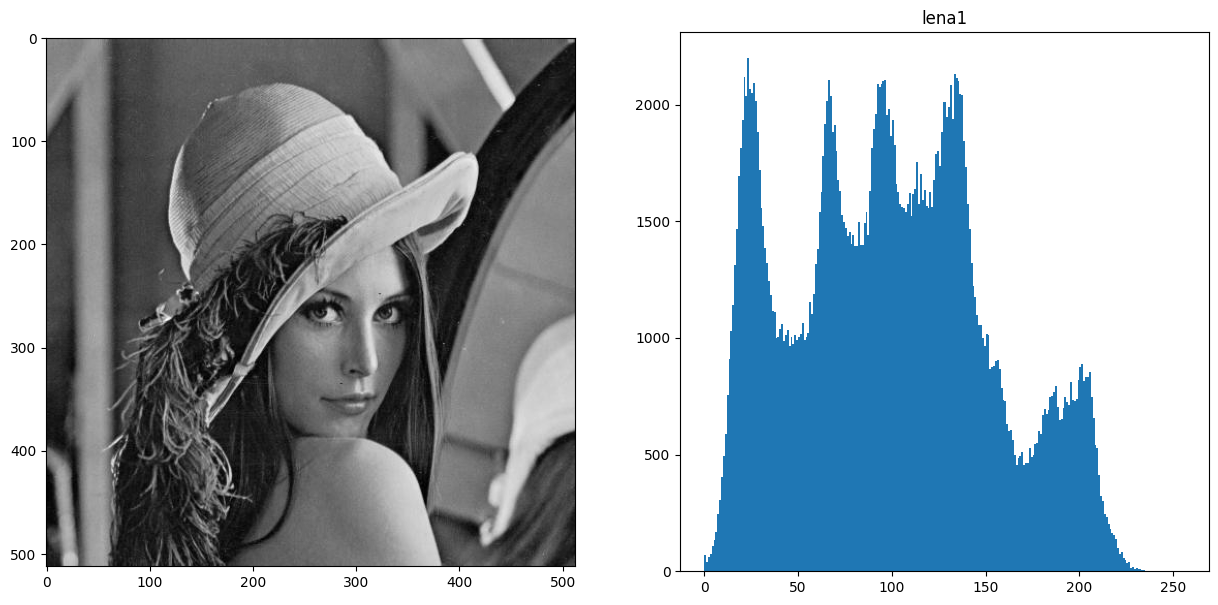

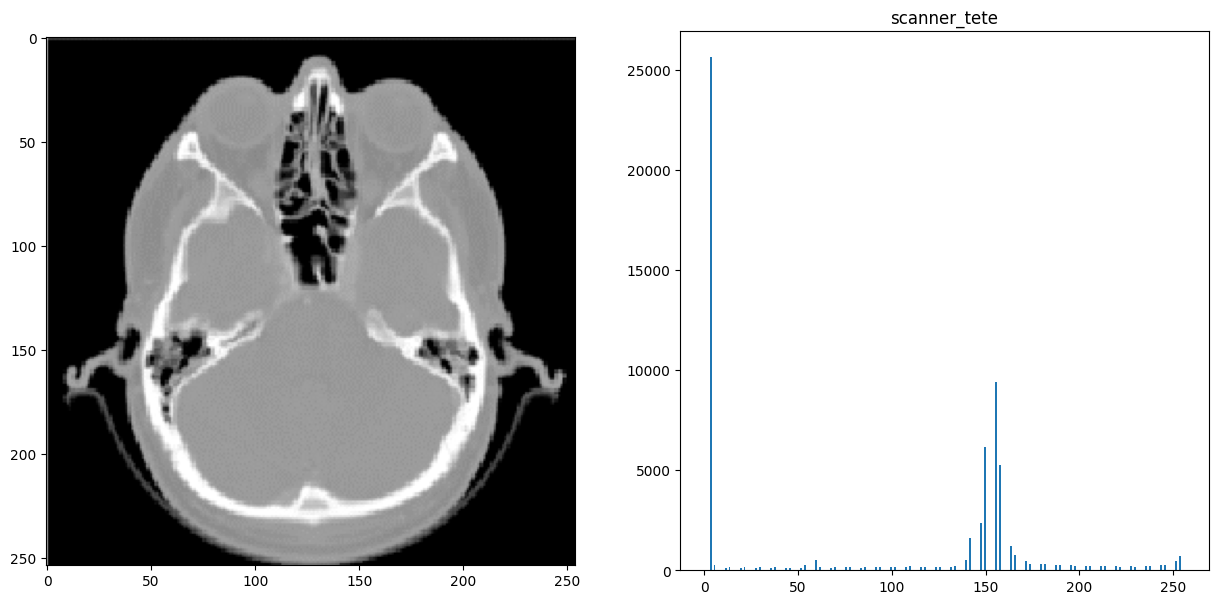

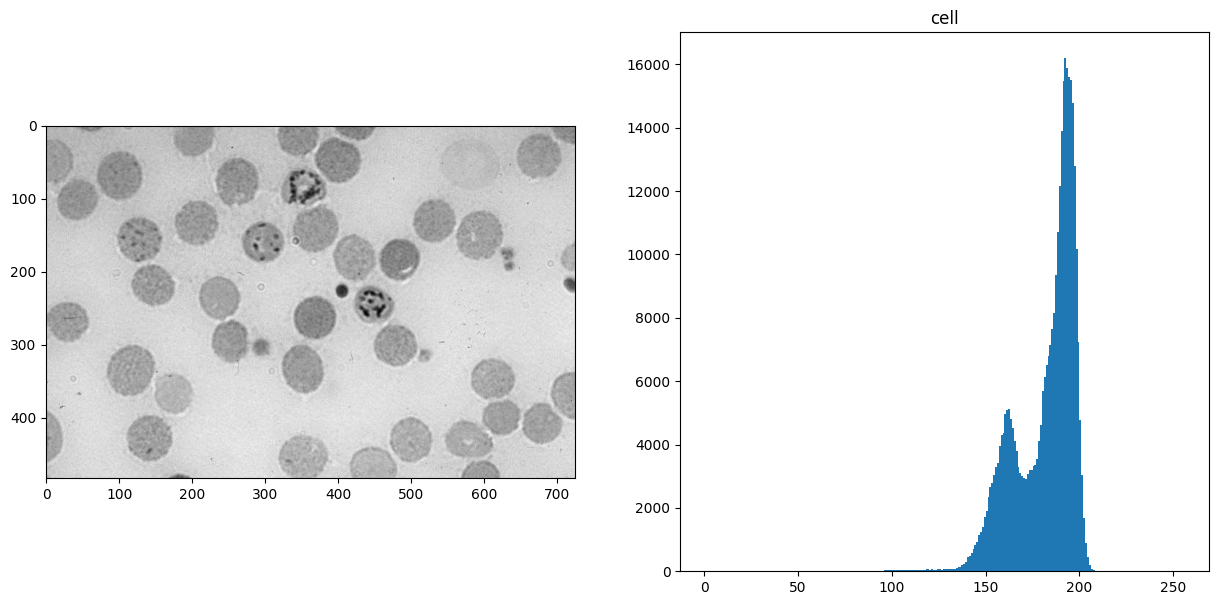

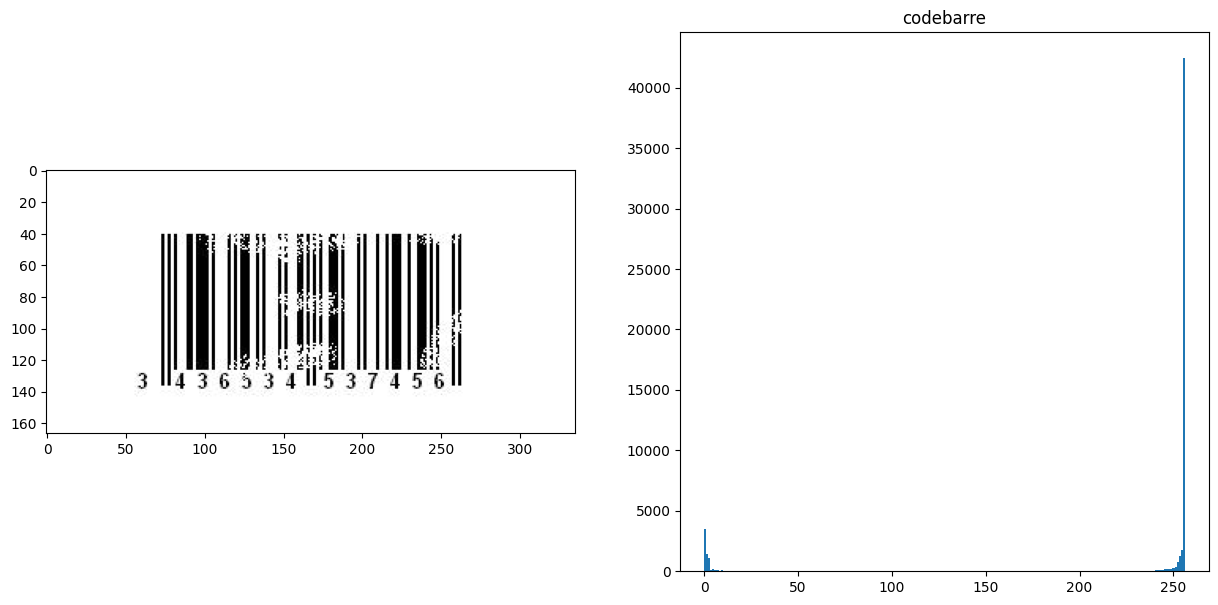

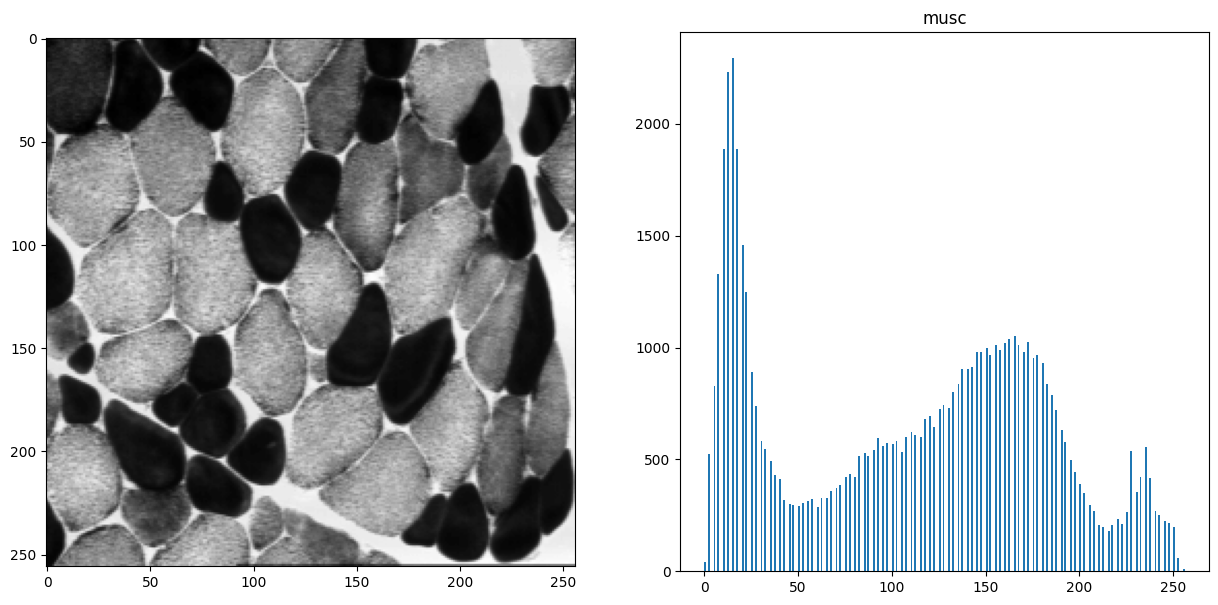

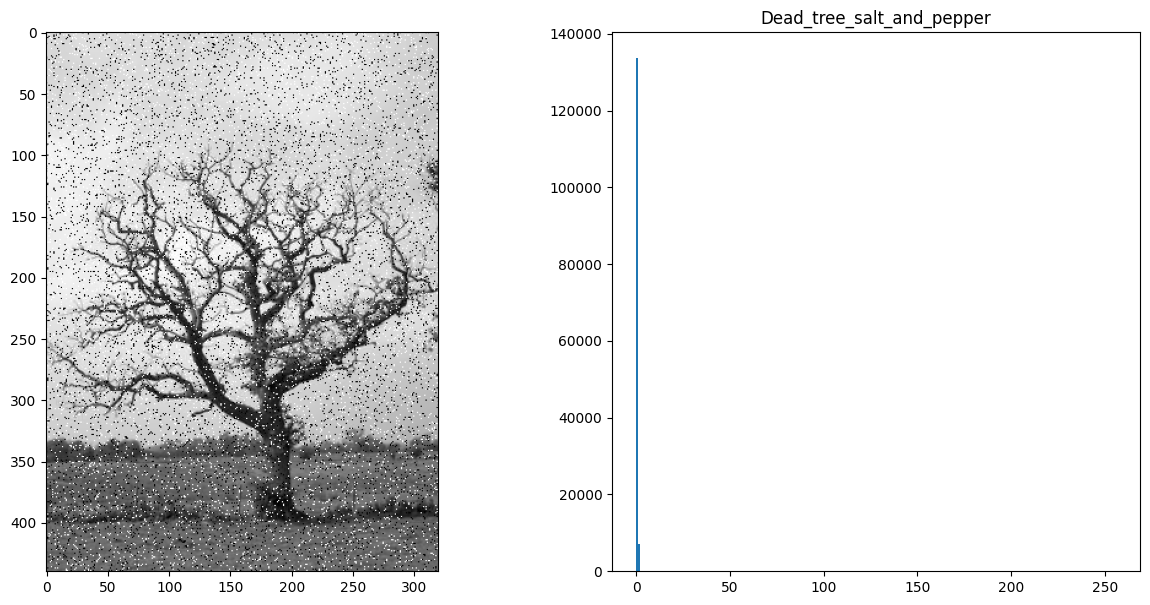

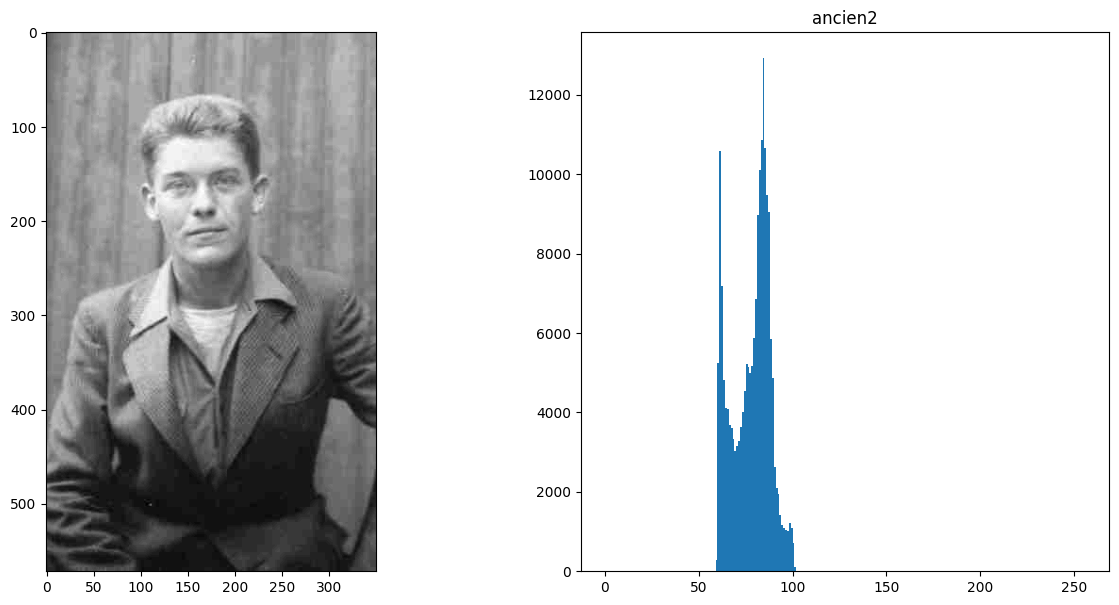

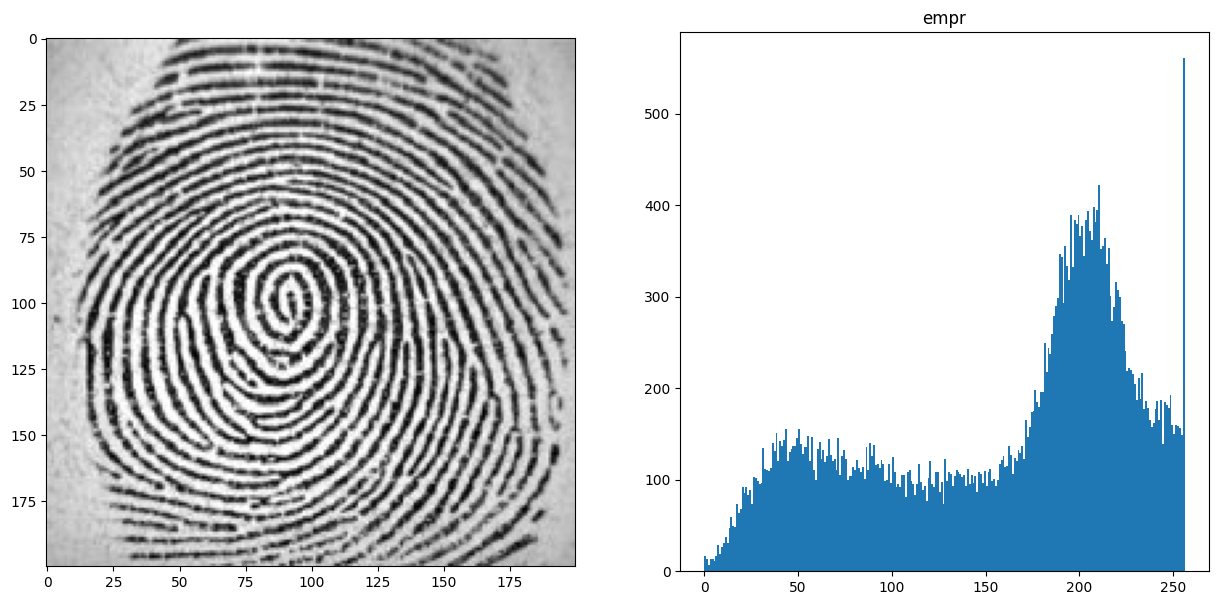

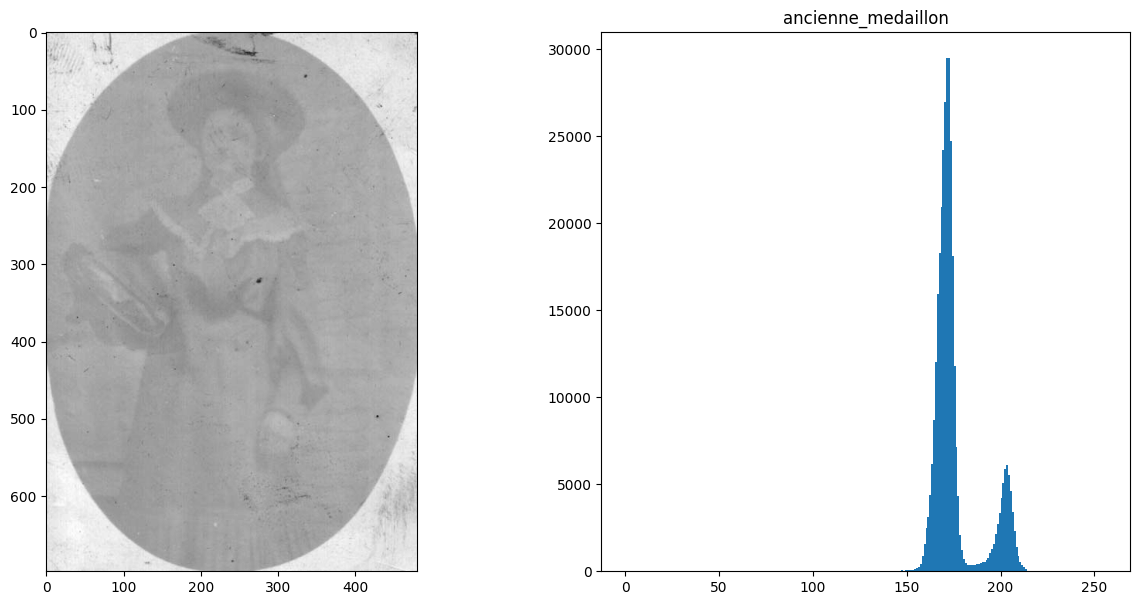

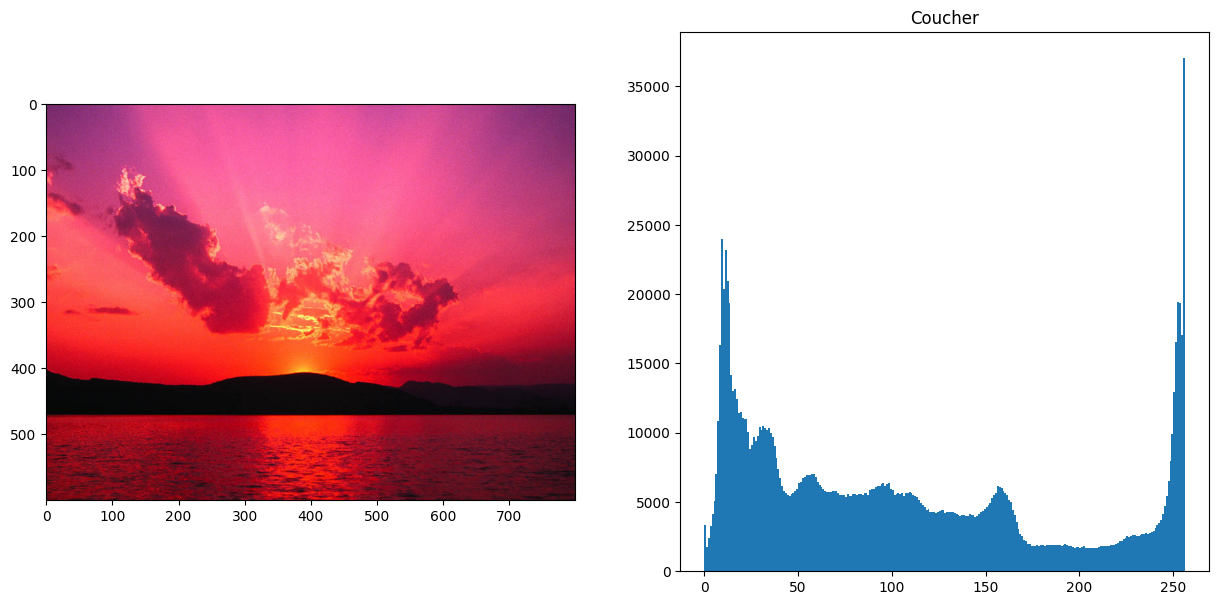

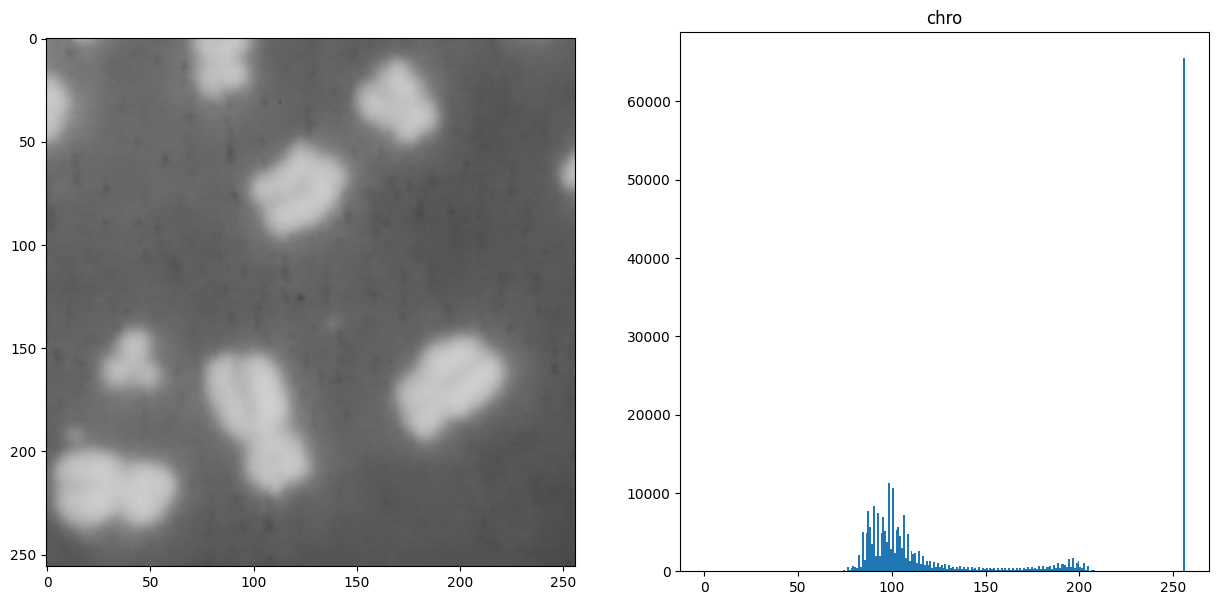

In [84]:
i = 0
for image in images:
    plt.figure(i, figsize=(15, 7))
    plt.subplot(121)
    plt.imshow(images[image], cmap='gray')
    plt.subplot(122)
    plt.hist(images[image].ravel(),256,[0,256]);
    plt.title(image)
    plt.show()

### 2. Choisissez une image bien contrastée. Ajouter (et retrancher) une valeur fixe à tous les pixels d’une image en niveau de gris. Quelle en est la conséquence sur l’image résultante ainsi que sur son histogramme ?

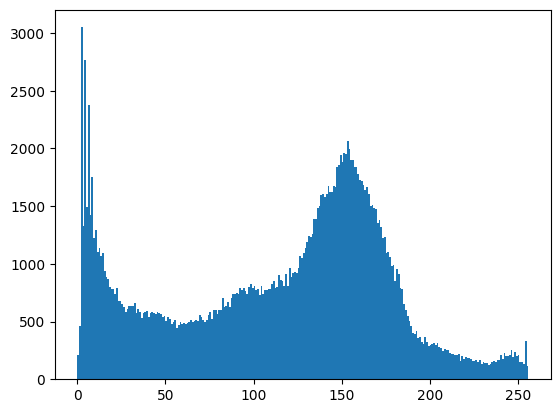

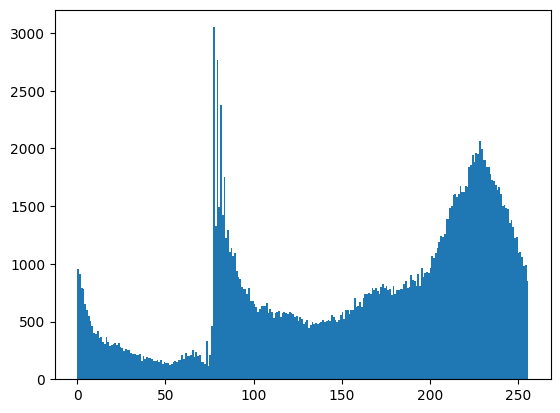

In [49]:
ancien : np.ndarray = images["ancien"]

new_image = ancien + 75
plt.hist(ancien.ravel(), 256, [0, 256])
plt.show()
plt.hist(new_image.ravel(), 256, [0, 256])
plt.show()

### 

**On constate qu'il y'a un decalage de l'histogramme du fait que les pixel qui depasse 255 subissent un modulo car on code en 8 bits**

**Pour l'image les pixel clair c'est t'a dire de niveau de gris proche de 255 devien sombre car il sont plus secceptibles de depasser 255 apres l'ajout de niveau de gris**

### 3. Afficher les histogrammes des images ancien et ancien2.

In [18]:
list(images.keys())

['lena1',
 'scanner_tete',
 'cell',
 'codebarre',
 'uro_irm',
 'musc',
 'Dead_tree_salt_and_pepper',
 'texte',
 'ancien2',
 'ancien',
 'echo',
 'empr',
 'photocoul',
 'ancienne_medaillon',
 'Coucher',
 'chro']

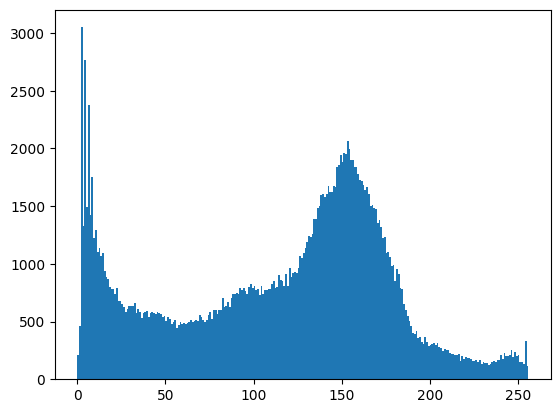

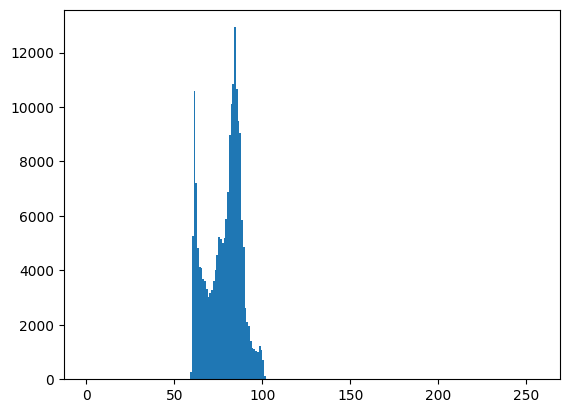

In [24]:
ancien = images["ancien"]
ancien2 = images["ancien2"]

plt.hist(ancien.ravel(), 256, [0, 256])
plt
plt.show()
plt.hist(ancien2.ravel(), 256, [0, 256])
plt.show()

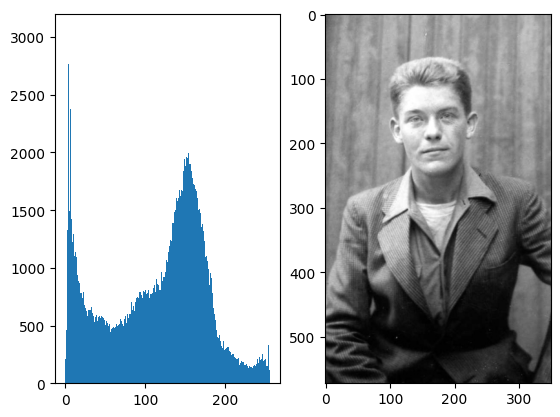

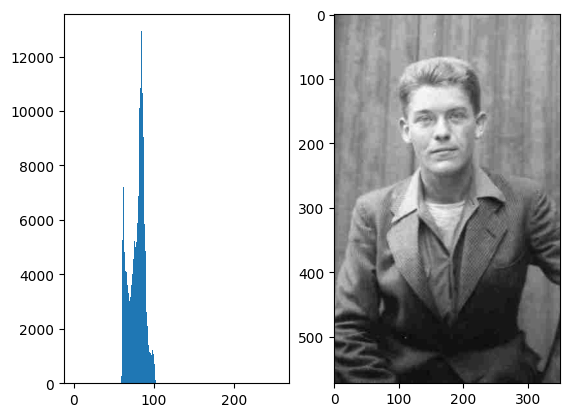

In [23]:
plt.figure(0)
plt.subplot(121)
plt.hist(ancien.ravel(), 256, [0, 256])


plt.subplot(122)
plt.imshow(ancien, cmap='gray')


plt.figure(1)
plt.subplot(121)
plt.hist(ancien2.ravel(), 256, [0, 256])

plt.subplot(122)
plt.imshow(ancien2, cmap='gray')

plt.show()

### Calculer, pour chaque image, le NdG moyen et la variance ou l'écart-type sur les NdG de l'image (utilisez les fonctions des librairies Python).

In [55]:
def get_stats(img : np.ndarray):
    return {
    "moyenne" : np.mean(img),
    "ecart-type" : np.std(img),
    "variance" : np.std(img)**(0.5),
    "contrast" : (np.max(img) - np.min(img))/(np.max(img)  + np.min(img))
    }

stats = {
    "ancien" : get_stats(ancien),
    "ancien2" : get_stats(ancien2)
}


for stat in stats:
    print(stat)
    for feature, value in stats[stat].items():
        print("\t",feature, ":", value)

ancien
	 moyenne : 113.18010489510489
	 ecart-type : 63.145615651547594
	 variance : 7.946421562662504
	 contrast : 1.0
ancien2
	 moyenne : 77.74641358641358
	 ecart-type : 9.928763230407387
	 variance : 3.1509940067234954
	 contrast : 0.2830188679245283


## Partie II : Prétraitements simples : inversion, seuillage, transformation de contraste

### 1. Programmer l’inversion d’une image. L’appliquer à une image NdG et une image couleur.

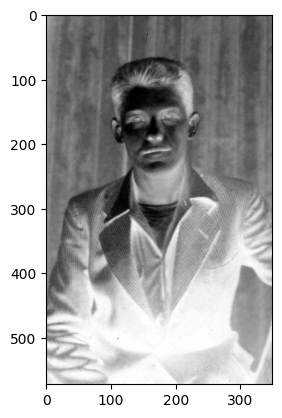

In [60]:
invert = lambda x : (255 - x)

inverted_ancien = invert(ancien)

plt.imshow(inverted_ancien, cmap="gray")

### 2. Programmer le seuillage d’une image, sans fonction prédéfinie, avec un seuil que vous définissez manuellement. Pour quelles images parmi celles fournies le seuillage est-il adapté ? Comment choisir le seuil ? Donner des exemples d’images seuillées avec la valeur du seuil.

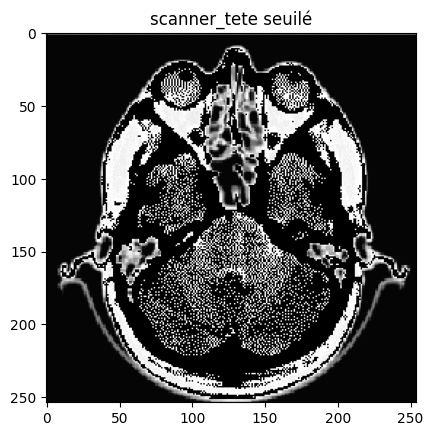

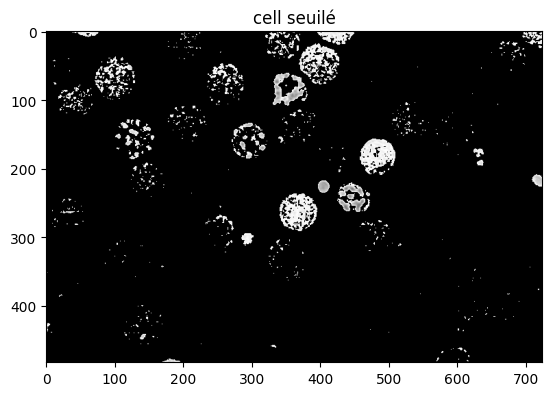

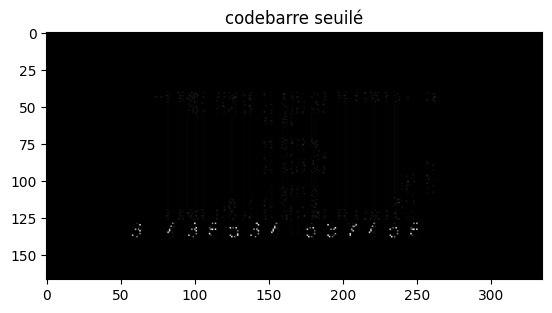

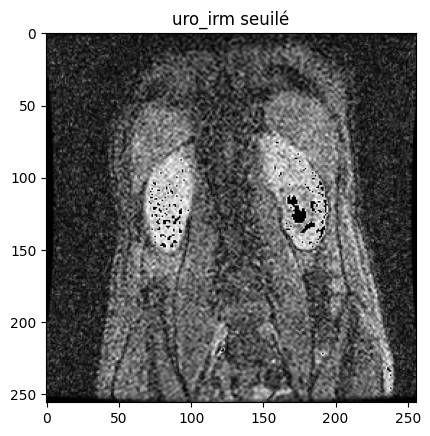

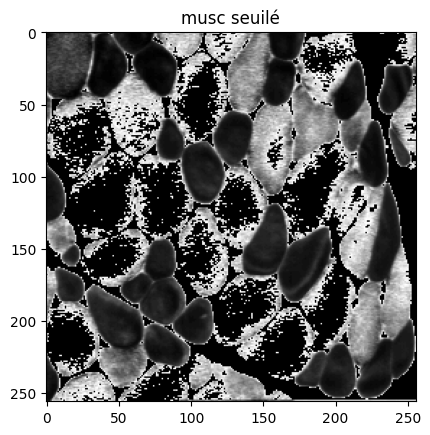

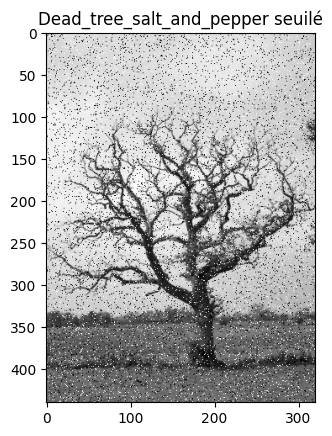

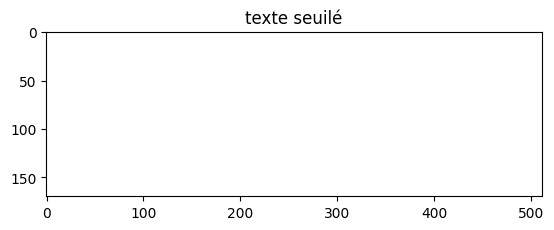

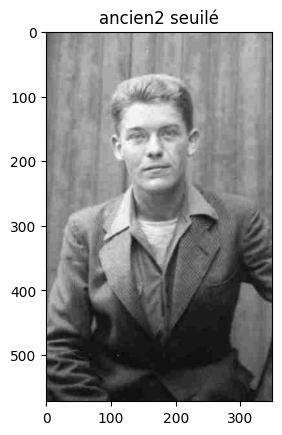

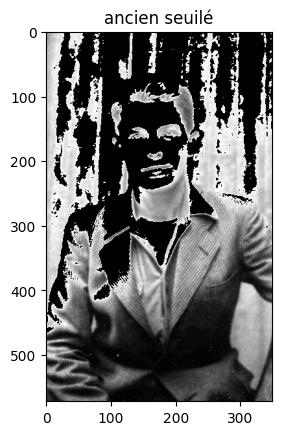

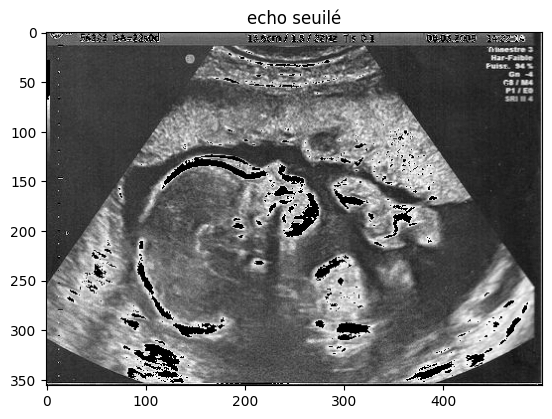

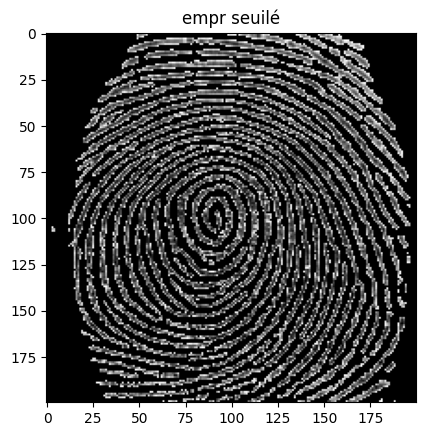

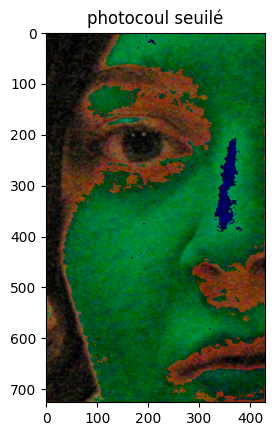

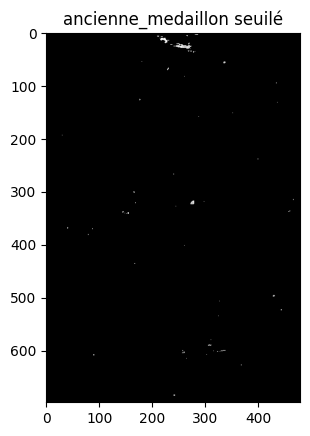

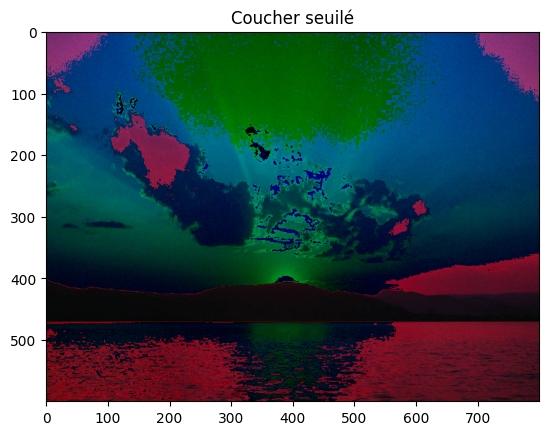

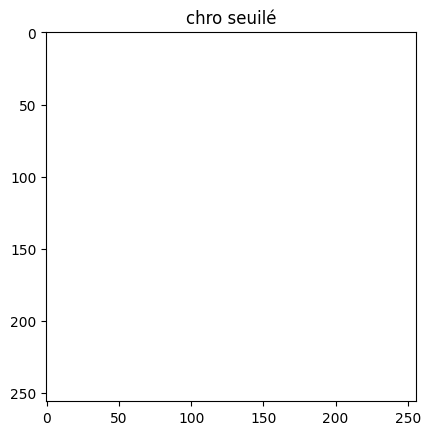

In [85]:

seuille = 150

for image in images:

    img = images[image].copy()
    img[img > seuille] = 0
    plt.imshow(img, cmap='gray')
    plt.title(image + " seuilé")
    plt.show()

**On peut choisir notre seuil en par rapport a notre histogramme en localisant les minimas**

**Oubien on peut ecrire un algorithme de recherche de seuil particulier**

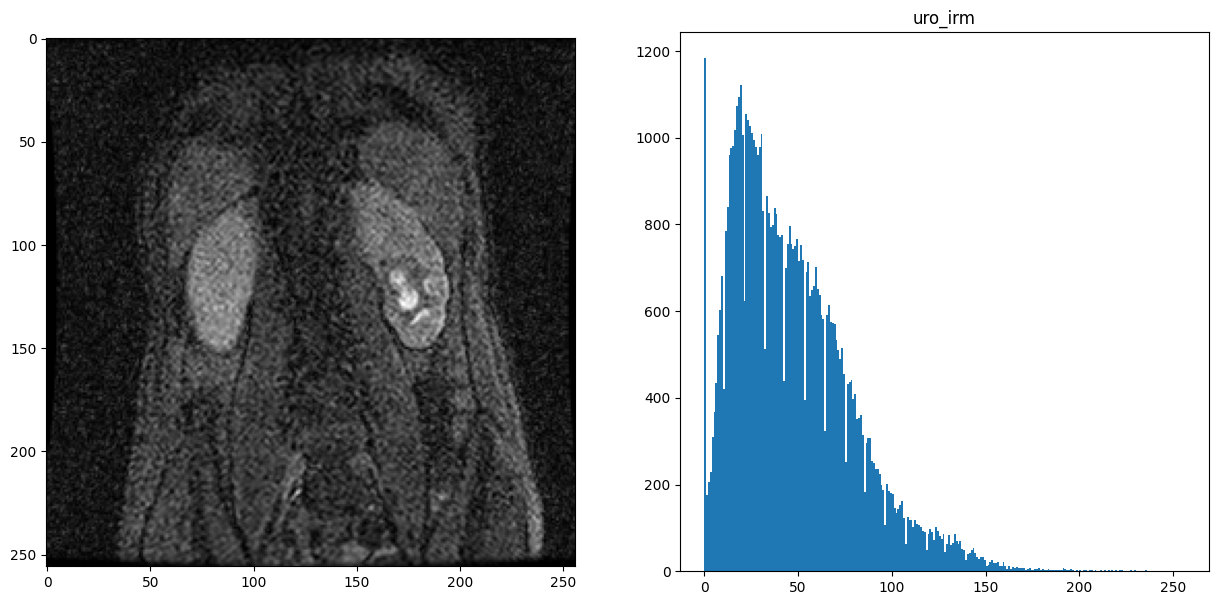

In [89]:
uro  = images["uro_irm"]
plt.figure(i, figsize=(15, 7))
plt.subplot(121)
plt.imshow(uro, cmap='gray')
plt.subplot(122)
plt.hist(uro.ravel(),256,[0,256]);
plt.title("uro_irm")
plt.show()

Vue l'histogramme on peut choisir un 100  comme maximisation , ainsi on peut extraire les reins de l'image

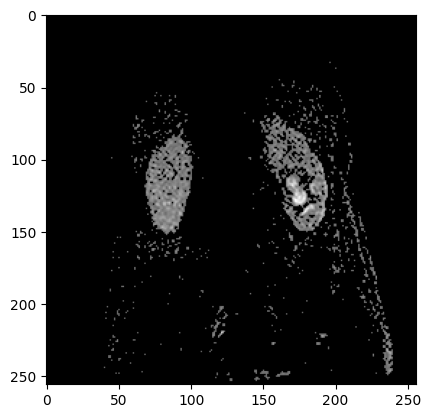

In [90]:
uro_s = uro[uro <100] = 0

plt.imshow(uro, cmap='gray')

### 3. Appliquer les seuillage à l’image d’empreinte digitale. Donner la densité de pixels noirs (nombre de pixels noirs/nombre de pixels total).

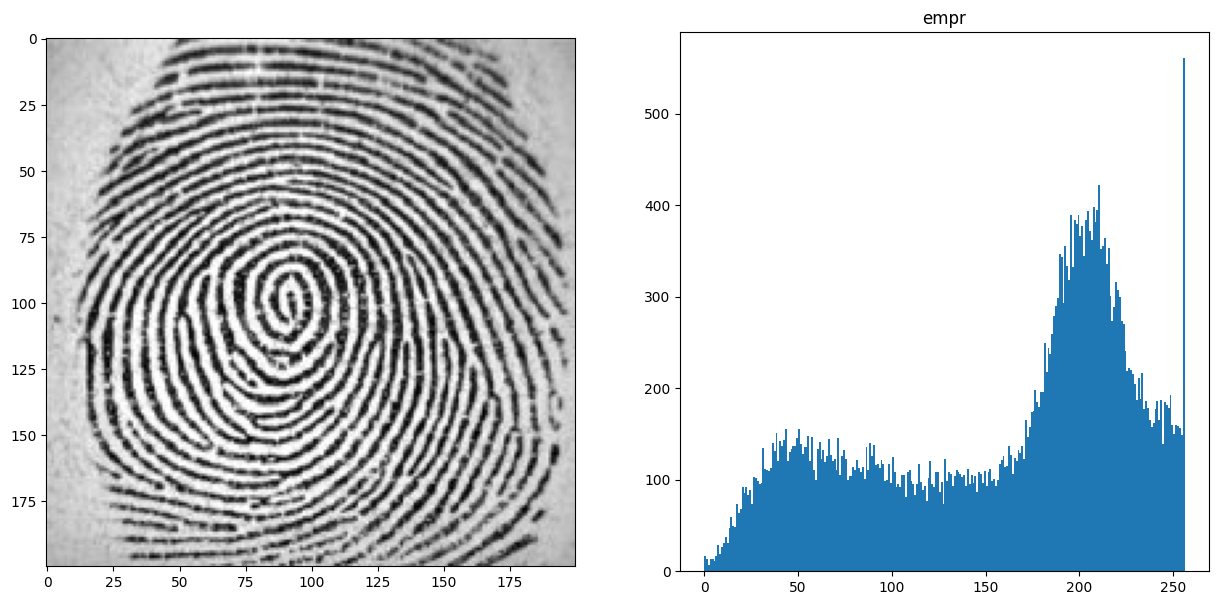

In [105]:
empr = images["empr"].copy()

plt.figure(i, figsize=(15, 7))
plt.subplot(121)
plt.imshow(empr, cmap='gray')
plt.subplot(122)
plt.hist(empr.ravel(),256,[0,256]);
plt.title("empr")
plt.show()



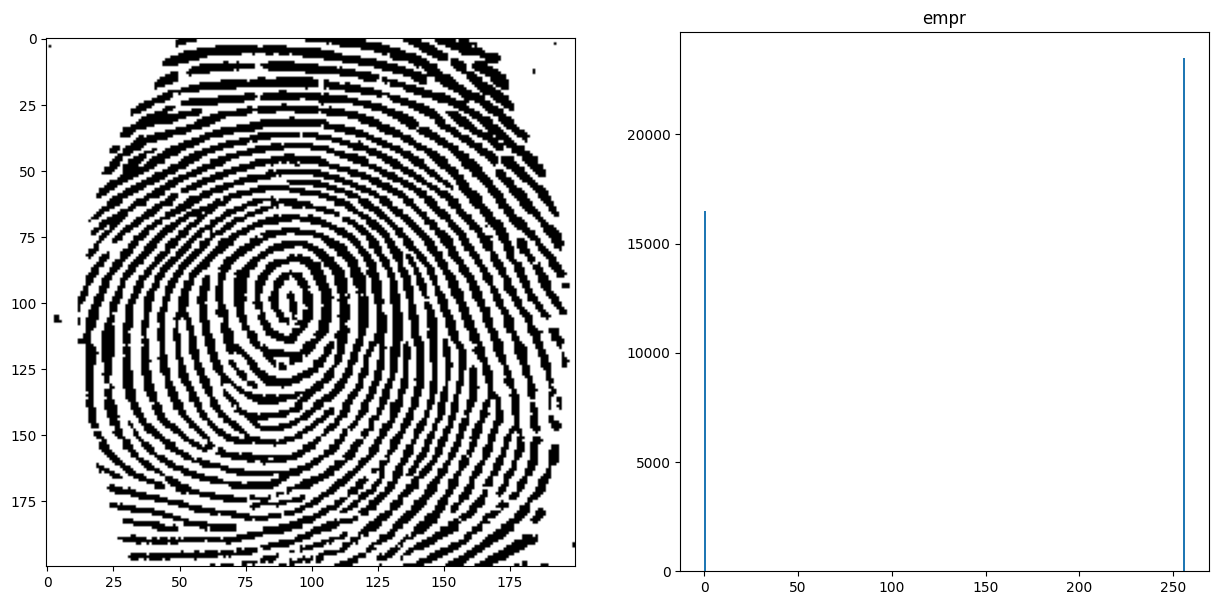

In [108]:

empr[empr > 160 ] = 255
empr[empr <= 160 ] = 0

plt.figure(i, figsize=(15, 7))
plt.subplot(121)
plt.imshow(empr, cmap='gray')
plt.subplot(122)
plt.hist(empr.ravel(),256,[0,256]);
plt.title("empr")
plt.show()

### 4. Programmer l’étirement d’histogramme par extension linéaire de la dynamique (sans fonction prédéfinie). On prendra le min et le max de la distribution, et également des valeurs de NdG définies comme étant celles contenant 5% et 95% des pixels de l’image sur l’histogramme

In [99]:
len(uro.ravel())

65536

In [111]:
min = np.min(uro)
max = np.max(uro)

def normalize(img, min, max):
    f = lambda x : x-min//(max-min)
    img[img < min] = 0
    img[img >max] = 255
    img[min <= img <= max] = f(image)
    return img

plt.imshow(normalize(uro, min, max))

UFuncTypeError: ufunc 'subtract' did not contain a loop with signature matching types (dtype('<U4'), dtype('uint8')) -> None